In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Trabalhando com Dados Estatísticos e Produzindo Figuras

## Banco de Dados

Esses primeiro dados foram obtidos no ComexStat e fazem referência aos dados de importação de fertilizantes pelo Brasil entre os anos de 2012 e 2022.

In [2]:
dados = pd.read_excel("C:\JupyterLab\Modelagem de Empreendedorismo\DadosFertilizantesImportacoes.xlsx")

In [13]:
dados.head(5)

,Ano,Mês,Países,UF do Produto,Valor FOB (US$),Quilograma Líquido
0,2022,12,África do Sul,São Paulo,99936,60620
1,2022,12,Alemanha,Goiás,2318800,4000000
2,2022,12,Alemanha,Mato Grosso,17391000,30000000
3,2022,12,Alemanha,Pará,580378,1102483
4,2022,12,Alemanha,Rio Grande do Sul,19590950,32965450


## Gasto em todo período por UF

In [3]:
valor_gasto_uf = []
estados = ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará', 'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima', 'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins']
ufs_brasil = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']
for uf in estados:
    estado = dados[dados['UF do Produto'] == uf]
    valor_total_uf = round(sum(list(estado['Valor FOB (US$)']))/1e9,1) # Em milhões
    valor_gasto_uf.append(valor_total_uf)

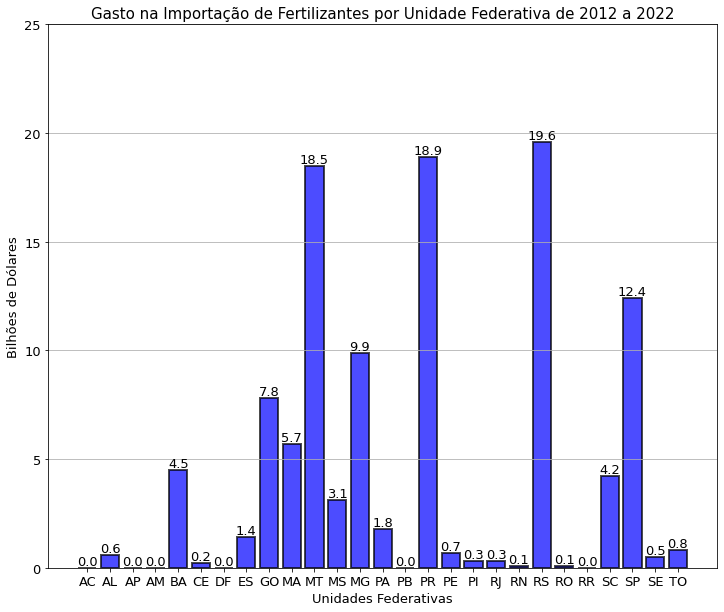

In [4]:
plt.figure(figsize=(12,10))

plt.bar(ufs_brasil, valor_gasto_uf, color='blue', edgecolor='black', linewidth=2, alpha=0.7)

plt.xticks(ufs_brasil, fontsize=13)
plt.yticks([0, 5, 10, 15, 20, 25], fontsize=13)

for estado, valor in zip(ufs_brasil, valor_gasto_uf):
    plt.text(estado, valor, str(valor), ha='center', va='bottom', fontsize=13)

plt.xlabel('Unidades Federativas', fontsize=13)
plt.ylabel('Bilhões de Dólares', fontsize=13)
plt.title('Gasto na Importação de Fertilizantes por Unidade Federativa de 2012 a 2022', fontsize=15)
plt.grid(axis='y', linestyle='-', alpha=1)
plt.savefig('Gasto Anual dos Estados.jpg', dpi=300)
plt.show()

## Gasto Anual do Brasil

In [5]:
valor_gasto_ano = []
anos = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
for ano in anos:
    Ano = dados[dados['Ano'] == ano]
    valor_total_ano = round(sum(list(Ano['Valor FOB (US$)']))/1e9,3)
    valor_gasto_ano.append(valor_total_ano)

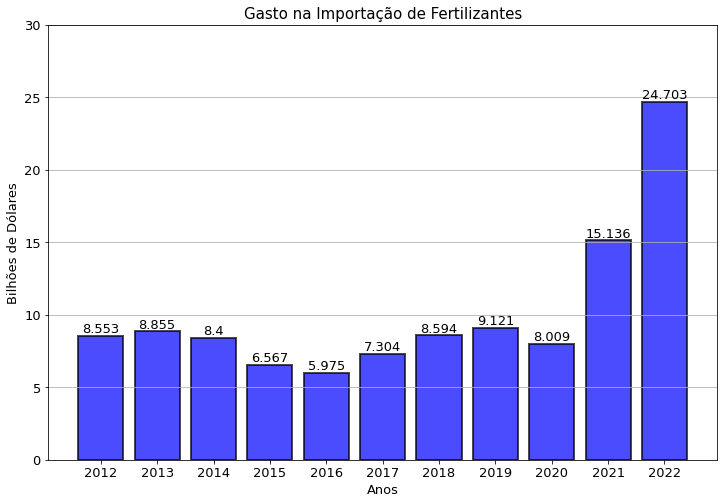

In [6]:
# Gasto Anual do Brasil

plt.figure(figsize=(12,8))

plt.bar(anos, valor_gasto_ano, color='blue', edgecolor='black', linewidth=2, alpha=0.7)

plt.xticks(anos, fontsize=13)
plt.yticks([0, 5, 10, 15, 20, 25, 30], fontsize=13)

for ano, valor in zip(anos, valor_gasto_ano):
    plt.text(ano, valor, str(valor), ha='center', va='bottom', fontsize=13)

plt.xlabel('Anos', fontsize=13)
plt.ylabel('Bilhões de Dólares', fontsize=13)
plt.title('Gasto na Importação de Fertilizantes', fontsize=15)
plt.grid(axis='y', linestyle='-', alpha=1)
plt.savefig('Gasto Anual do Brasíl.jpg', dpi=300)
plt.show()

## Kilogramas Anuais para o Brasil

In [14]:
kilograma_ano = []
anos = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
for ano in anos:
    Ano = dados[dados['Ano'] == ano]
    massa_ano = round(sum(list(Ano['Quilograma Líquido']))/1e9,3) # Em bilhões de quilos
    kilograma_ano.append(massa_ano)

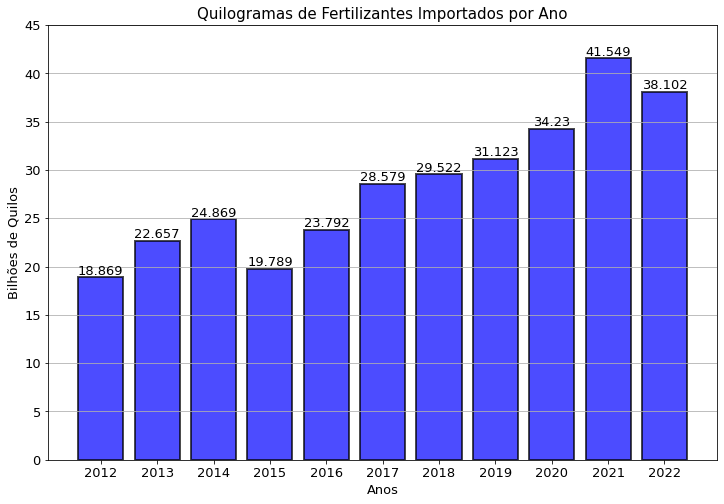

In [17]:
# Gasto Anual do Brasil

plt.figure(figsize=(12,8))

plt.bar(anos, kilograma_ano, color='blue', edgecolor='black', linewidth=2, alpha=0.7)

plt.xticks(anos, fontsize=13)
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], fontsize=13)

for ano, valor in zip(anos, kilograma_ano):
    plt.text(ano, valor, str(valor), ha='center', va='bottom', fontsize=13)

plt.xlabel('Anos', fontsize=13)
plt.ylabel('Bilhões de Quilos', fontsize=13)
plt.title('Quilogramas de Fertilizantes Importados por Ano', fontsize=15)
plt.grid(axis='y', linestyle='-', alpha=1)
plt.savefig('Quilogramas de Fertilizantes Importados por Ano.jpg', dpi=300)
plt.show()

## Gasto do Brasil com cada País

In [7]:
países = ['Argélia','Arábia Saudita','Belarus','Canadá','Catar','China','Estados Unidos','Marrocos','Omã','Rússia']

In [8]:
import pycountry

paises = ['Argélia', 'Arábia Saudita', 'Belarus', 'Canadá', 'Catar', 'China', 'Estados Unidos', 'Marrocos', 'Omã', 'Rússia']

paises_abreviados = []

for pais in paises:
    try:
        codigo = pycountry.countries.search_fuzzy(pais)[0].alpha_3
        paises_abreviados.append(codigo)
    except LookupError:
        paises_abreviados.append('N/A')

paises_abreviados[0] = 'DZA'
paises_abreviados[1] = 'SAU'
paises_abreviados[6] = 'USA'
paises_abreviados[7] = 'MAR'
paises_abreviados[8] = 'OMN'

print(paises_abreviados)

['DZA', 'SAU', 'BLR', 'CAN', 'CPV', 'CHN', 'USA', 'MAR', 'OMN', 'RUS']


In [9]:
valor_gasto_paises = []

for p in países:
    país = dados[dados['Países'] == p]
    valor_total_país = round(sum(list(país['Valor FOB (US$)']))/1e9,3)
    valor_gasto_paises.append(valor_total_país)

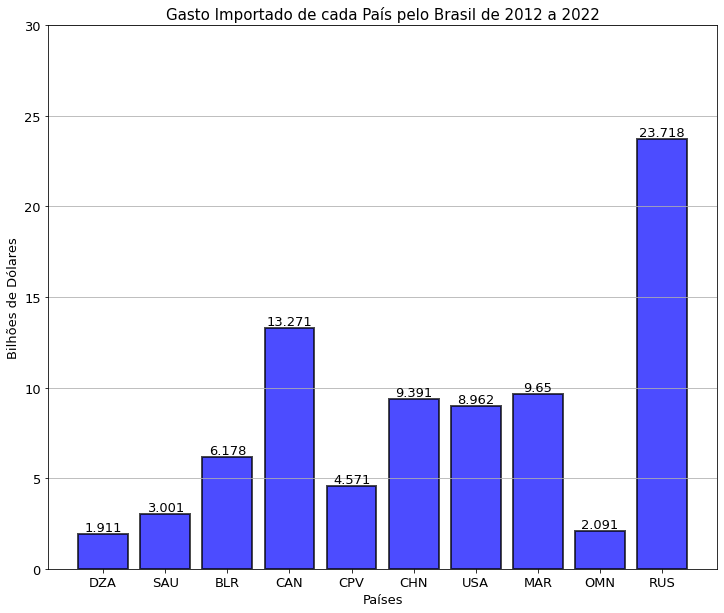

In [10]:
plt.figure(figsize=(12,10))

plt.bar(paises_abreviados, valor_gasto_paises, color='blue', edgecolor='black', linewidth=2, alpha=0.7)

plt.xticks(paises_abreviados, fontsize=13)
plt.yticks([0, 5, 10, 15, 20, 25, 30], fontsize=13)

for p, valor in zip(paises_abreviados, valor_gasto_paises):
    plt.text(p, valor, str(valor), ha='center', va='bottom', fontsize=13)

plt.xlabel('Países', fontsize=13)
plt.ylabel('Bilhões de Dólares', fontsize=13)
plt.title('Gasto Importado de cada País pelo Brasil de 2012 a 2022', fontsize=15)
plt.grid(axis='y', linestyle='-', alpha=1)
plt.savefig('Gasto Anual do Brasíl com cada País.jpg', dpi=300)
plt.show()

## Mais dados

In [19]:
dados_solo = pd.read_csv("C:\JupyterLab\Modelagem de Empreendedorismo\wosis_latest_cecph7.csv")

In [23]:
dados_solo_brasil = dados_solo[dados_solo['country_name'] == 'Brazil']

In [26]:
dados_solo_brasil.head(20)

,X,Y,profile_id,profile_layer_id,country_name,upper_depth,lower_depth,layer_name,litter,cecph7_value,cecph7_value_avg,cecph7_method,cecph7_date,cecph7_dataset_id,cecph7_profile_code,cecph7_licence
36426,-47.719444,-15.591667,66989,601161,Brazil,0.0,18,Ap,0.0,"{1:10.40,2:10.40}",10.4,"{""1:acidity approximation = not applied, bases...","{1:1985-4-3,2:1985-4-3}",US-NCSS,85P0741,U.S. Public Domain http://www.usa.gov/publicdo...
36427,-47.719444,-15.591667,66989,601162,Brazil,18.0,30,A,0.0,"{1:9.10,2:9.10}",9.1,"{""1:acidity approximation = not applied, bases...","{1:1985-4-3,2:1985-4-3}",US-NCSS,85P0741,U.S. Public Domain http://www.usa.gov/publicdo...
36428,-47.719444,-15.591667,66989,601163,Brazil,30.0,38,BA,0.0,"{1:7.10,2:7.10}",7.1,"{""1:acidity approximation = not applied, bases...","{1:1985-4-3,2:1985-4-3}",US-NCSS,85P0741,U.S. Public Domain http://www.usa.gov/publicdo...
36429,-47.719444,-15.591667,66989,601164,Brazil,38.0,70,Bwg1,0.0,"{1:6.30,2:6.10,3:6.10,4:6.30}",6.2,"{""1:acidity approximation = not applied, bases...","{1:1985-4-3,2:1985-4-3,3:1985-4-3,4:1985-4-3}",US-NCSS,85P0741,U.S. Public Domain http://www.usa.gov/publicdo...
36430,-47.719444,-15.591667,66989,601165,Brazil,70.0,110,Bwg2,0.0,"{1:6.50,2:6.50}",6.5,"{""1:acidity approximation = not applied, bases...","{1:1985-4-3,2:1985-4-3}",US-NCSS,85P0741,U.S. Public Domain http://www.usa.gov/publicdo...
36431,-47.719444,-15.591667,66989,601166,Brazil,110.0,180,BCvg,0.0,"{1:5.40,2:5.40}",5.4,"{""1:acidity approximation = not applied, bases...","{1:1985-4-3,2:1985-4-3}",US-NCSS,85P0741,U.S. Public Domain http://www.usa.gov/publicdo...
36432,-47.791668,-21.258333,66990,601169,Brazil,0.0,18,Ap,0.0,"{1:14.40,2:14.40}",14.4,"{""1:acidity approximation = not applied, bases...","{1:1985-4-3,2:1985-4-3}",US-NCSS,85P0727,U.S. Public Domain http://www.usa.gov/publicdo...
36433,-47.791668,-21.258333,66990,601170,Brazil,18.0,45,NaN,0.0,"{1:10.50,2:10.50}",10.5,"{""1:acidity approximation = not applied, bases...","{1:1985-4-3,2:1985-4-3}",US-NCSS,85P0727,U.S. Public Domain http://www.usa.gov/publicdo...
36434,-47.791668,-21.258333,66990,601171,Brazil,45.0,85,BA,0.0,"{1:7.90,2:7.90}",7.9,"{""1:acidity approximation = not applied, bases...","{1:1985-4-3,2:1985-4-3}",US-NCSS,85P0727,U.S. Public Domain http://www.usa.gov/publicdo...
36435,-47.791668,-21.258333,66990,601172,Brazil,85.0,130,Bo1,0.0,"{1:6.90,2:6.90}",6.9,"{""1:acidity approximation = not applied, bases...","{1:1985-4-3,2:1985-4-3}",US-NCSS,85P0727,U.S. Public Domain http://www.usa.gov/publicdo...
